# CAP5610 Final Project

## Super Market Sales Data Prediction

<u> <font color ="purple"><h3> Preliminary Project Statement:</h3></font></u> <br>
The purpose of the project is to predict the supermarket sales across the cities. The project will also involve the overall predictive analysis of the sales volume, profit and market layout.
This will enable us to gage the future sustainability of the supermarket based on its sales.

<u> <font color ="purple"><h3> About the Data:</h3></font></u>

We are using supermarket sales dataset from Kaggle. <br>
The source of data: https://www.kaggle.com/aungpyaeap/supermarket-sales <br>
The dataset is one of the historical sales of supermarket company in mynmar which has records of its 3 different branches for 3 months data. <br>
This dataset consists of 17 attributes and 1000 records.
Please find below information onthe attributes covered in this data set:

* Invoice id: Computer generated sales slip invoice identification number
* Branch: Branch of supercenter (3 branches are available identified by A, B and C).
* City: Location of supercenters
* Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
* Gender: Gender type of customer
* Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
* Unit price: Price of each product in dollars
* Quantity: Number of products purchased by customer
* Tax: 5% tax fee for customer buying
* Total: Total price including tax
* Date: Date of purchase (Record available from January 2019 to March 2019)
* Time: Purchase time (10am to 9pm)
* Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
* COGS: Cost of goods sold
* Gross margin percentage: Gross margin percentage
* Gross income: Gross income
* Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

<u> <font color ="purple"><h3> Exploratory Data Analysis:</h3></font></u>

In [3]:
#Importing required libraries & packages
import pandas as pd
import numpy as np
from pandas import read_csv
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from random import seed
from random import randrange
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
warnings.filterwarnings('ignore')

C:\PythonLearn\Anaconda\lib\site-packages\patsy\constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping


In [2]:
#pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [7]:
# read and load the csv data file
data = read_csv('supermarket_sales.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
data.shape

(1000, 17)

In [9]:
#Checking for null values in the dataset
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

We see that there are no null values in our dataset

**Statistical Analysis of the data :**

In [10]:
Unit_price = data['Unit price']
Quantity = data['Quantity']
Tax  = data['Tax 5%']
Total_Price = data['Total']
cogs = data['cogs']
gross_income = data['gross income']
Rating = data['Rating']

In [11]:
Data_stats1 = data.describe()
Data_stats2 = data.agg(['skew'])
Data_Stats = Data_stats1.append(Data_stats2)
Data_Stats

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000
skew,0.007077,0.012941,0.892570,0.892570,0.89257,0.000000e+00,0.892570,0.00901


The above table provides key statistics about the quantitative values in the dataset. Using this we can get a overview about these data attributes for our analysis.

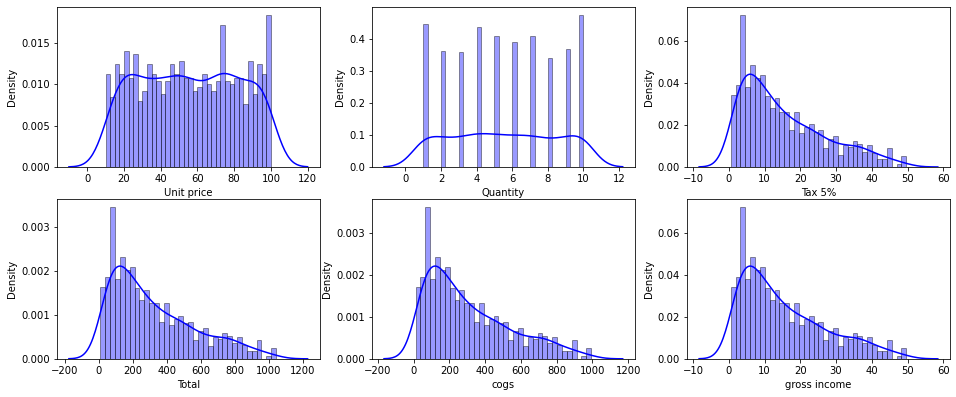

In [12]:
#Producing a histogram for the given variables
plt.figure(figsize = [16, 10])
plt.subplot(3, 3, 1)
sns.distplot(Unit_price, hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.subplot(3, 3, 2)
sns.distplot(Quantity, hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.subplot(3, 3, 3)
sns.distplot(Tax, hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.subplot(3, 3, 4)
sns.distplot(Total_Price, hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.subplot(3, 3, 5)
sns.distplot(cogs, hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.subplot(3, 3, 6)
sns.distplot(gross_income, hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.show()

From the above distribution density plots we can infer that:
* data attributes like Total, cogs,Tax 5% and gross income are normaly distributed with some skewness towards the right
* there is some uniformity in distribution of Unit price and Quantity attributes with no skewness on either sides.

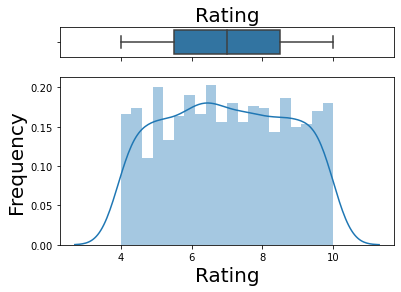

In [13]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
plt.ticklabel_format(style='plain',axis='x')
plt.ticklabel_format(style='plain',axis='y')
ax_box.set_title("Rating",fontsize=20)
Boxplot=sns.boxplot(Rating, ax=ax_box)
sns.distplot(Rating, ax=ax_hist,bins=20)
ax_hist.set_xlabel('Rating',fontsize=20)
ax_hist.set_ylabel('Frequency',fontsize=20)
ax_box.set(xlabel='')
plt.show()

By observing the distribution of "Rating" data attribute we can say that the rating values are normally distributed between 4 to 10 and the box plot above the distribution suggests that the mean rating by customers is around 7. This can be used as a parameter to define a threshold of rating that will inturn be used to segregate good (>7) and bad ratings (=<7).

In [16]:
QuantData = data[['Unit price','Quantity','Tax 5%','Total','cogs','gross income','Rating']]

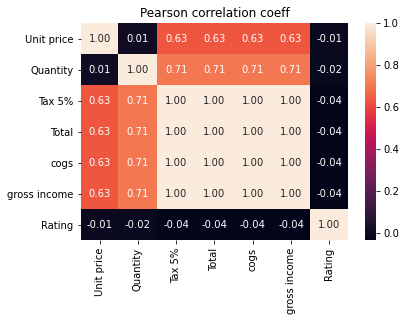

In [17]:
ax = plt.axes()
ax.set_title('Pearson correlation coeff')
sns.heatmap(QuantData.corr(), annot=True, fmt=".2f",ax = ax)
plt.show()

From the correlation matrix we can deduce that:
* There is a strong correlation between Total Price ,Tax 5% ,gross income and cogs.This shows that all these attributes are interrelated with a correlation coefficient of 1.
* There is a week correlation between Quantity and Unit price. Thus we can say that Quantity of the product sold does not effect the unit price of the product.
* There is positive correlation  of Unit price and Quantity with Total Price ,Tax 5% ,gross income and cogs.
* There is no relation of Rating with any of the available quantitative data attributes

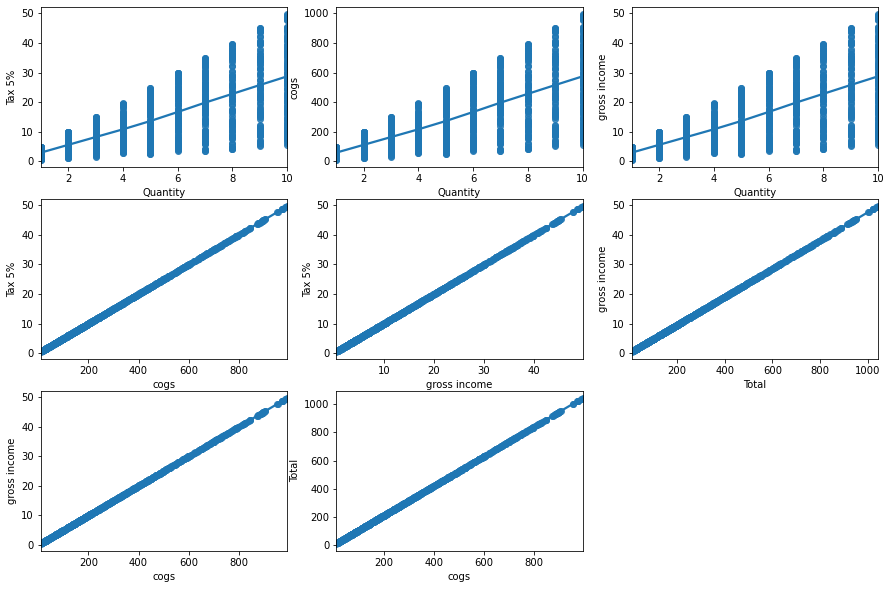

In [14]:
plt.figure(figsize = [15, 10])
plt.subplot(3, 3, 1)
sns.regplot(x=Quantity, y=Tax,data=data, lowess=True)
plt.subplot(3, 3, 2)
sns.regplot(x=Quantity, y=cogs,data=data, lowess=True)
plt.subplot(3, 3, 3)
sns.regplot(x=Quantity, y=gross_income,data=data, lowess=True)
plt.subplot(3, 3, 4)
sns.regplot(x=cogs, y=Tax,data=data, lowess=True)
plt.subplot(3, 3, 5)
sns.regplot(x=gross_income, y=Tax,data=data, lowess=True)
plt.subplot(3, 3, 6)
sns.regplot(x=Total_Price, y=gross_income,data=data, lowess=True)
plt.subplot(3, 3, 7)
sns.regplot(x=cogs, y=gross_income,data=data, lowess=True)
plt.subplot(3, 3, 8)
sns.regplot(x=cogs, y=Total_Price,data=data, lowess=True)
plt.show()

The above regression plots aid as a supporting visual to our deductions made from correlation matrix.

In [15]:
Gender = data['Gender']
le = LabelEncoder()
le.fit(Gender)
List = list(le.classes_)
labels = pd.Series( (v for v in List) )
Sizes = Gender.value_counts()

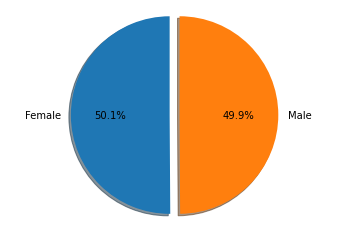

In [16]:
#Using matplotlib
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(Sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

From the pie chart we can say that the supermarket has evenly distributed customer base based on gender.While there are about 50.1% females visiting the supermarket there are about 49.9% males visiting the supermarket.

In [18]:
Customer_type = data['Customer type']
le = LabelEncoder()
le.fit(Customer_type)
List2 = list(le.classes_)
labels2 = pd.Series( (v for v in List2) )
Sizes2 = Customer_type.value_counts()

In [19]:
List2 = list(le.classes_)
List2

['Member', 'Normal']

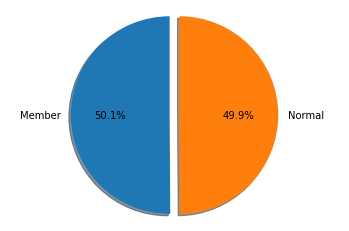

In [20]:
#Using matplotlib
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(Sizes2, explode=explode, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

From the above pie chart we can say that there are almost equal number of members and non-members visiting the supermarket

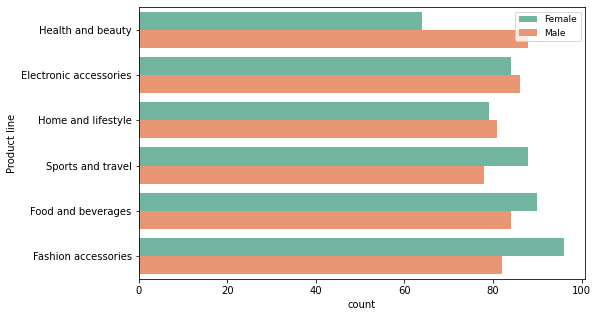

In [21]:
# Creating plot
plt.figure(figsize=(8,5))
ax = sns.countplot(y ='Product line', data = data, orient = 'h',hue = 'Gender',palette="Set2")
ax.legend(fontsize = 9) 
# show plot
plt.show()

The above visual shows the type of products that the customers buy are based on their gender.From the plot it is evident that the female customers prefer to purchase Fashion accessories, Food and beverages, Sports and travel related products more when compared to male customers. Male customers prefer buying home and lifestyle, electronic accessories and Health and beauty accessories more when compared to female customers.

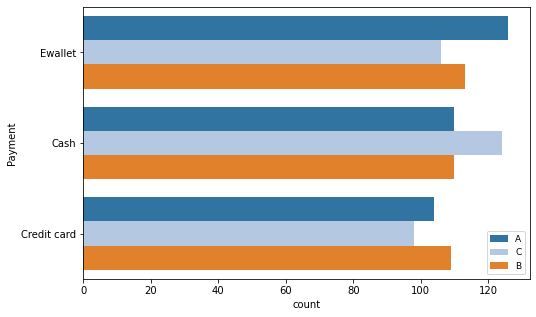

In [21]:
# Creating plot
plt.figure(figsize=(8,5))
ax = sns.countplot(y ='Payment', data = data, orient = 'h',hue = 'Branch',palette = "tab20")
ax.legend(fontsize = 9) 
# show plot
plt.show()

The above visual shows the payment methods used by customers in the 3 branches of super market. While customers visiting branch A prefer using Ewallet as the payment method, customers of branch C prefer Cash. Customers visiting branch B have almost same preference for all three modes of payment (Ewallet,Cash and Credit card) but there is a slightly higher use of credit card by branch B customers when compared to branch A and C.

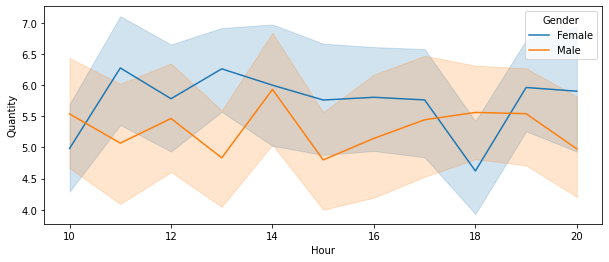

In [22]:
data["Time"]= pd.to_datetime(data["Time"])
data["Hour"]= (data["Time"]).dt.hour
plt.figure(figsize=(10,4))
fig = sns.lineplot(data=data, x="Hour", y="Quantity", hue="Gender")

Above plot shows the quantity of items purchased by male and female customers at different times of the day.<br>
We can infer from the plot that the items purchased by female customers is greater than Male customers for most part of the day.Although there is a brief decline in the purchase by female customers between 5PM and 7PM compared to male customers

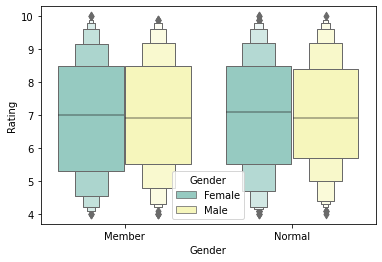

In [22]:
sns.boxenplot(x='Customer type',y = 'Rating',hue ='Gender',data = data,palette="Set3")
plt.xlabel('Gender')
plt.ylabel('Rating')
plt.show()

The above visual shows that irrespective of membership status, male customers give slightly higher rating that female customers for the products purchased at supermarket.

<u> <font color ="purple"><h3> Revised Project Statement:</h3></font></u> <br>

Based on the exploratory data analysis done so far, please find below our revised project Statement:

Project Goal: The purpose of this project is to predict the gross income generated across time for a supermarket with 3 branches in Mynamar (country).We would also like to predict gross income generated based on Quantity, Unit price etc.This will enable us to gage the future sustainability of the supermarket based on its sales.

<u> <font color ="purple"><h3> Baseline Model:</h3></font></u> <br>

### Baseline Model for Regression Analysis

In [23]:
dataset = data[['Unit price','Quantity', 'Tax 5%', 'Total','cogs', 'gross margin percentage', 'gross income']]

In [29]:
# split into train and test sets (70% is training data and 30% is testing data)
X = dataset.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
train_set = [x for x in train]

In [30]:
train.shape

(700, 7)

In [31]:
test.shape

(300, 7)

In [33]:
# Generate random predictions
def random_algorithm(train, test):
    output_values = [row[-1] for row in train]
    unique = list(set(output_values))
    predicted = list()
    for row in test:
        index = randrange(len(unique))
        predicted.append(unique[index])
    return predicted

In [34]:
from sklearn.metrics import accuracy_score
import random

random.seed(1)

Yhat = random_algorithm(train, test)
Y = test[:,6]
df = pd.DataFrame()
df['Y_true'] = Y
df['Y_pred'] = Yhat
df

,Y_true,Y_pred
0,24.1640,3.5975
1,4.8480,16.4000
2,9.8850,17.5950
3,36.2115,27.9510
4,39.7755,14.1960
...,...,...
295,2.0175,2.2790
296,48.6900,21.5650
297,1.5920,19.1300
298,3.2910,1.9710


In [35]:
R2_baseline = r2_score(Y, Yhat)
print('R^2 of the linear regression model is: ',R2_baseline)

R^2 of the linear regression model is:  -0.7565620660915815


We see that our baseline model of random algorithm provides a negative R squared value indicating that the baseline model is not useful for our target prediction. However for our baseline model we are using 'Unit price','Quantity', 'Tax 5%', 'Total','cogs'and 'gross margin percentage' as our predictor variables

### Baseline Model for Time Series Forecasting

In [36]:
data["Date"] = pd.to_datetime(data["Date"])

data = data.sort_values(by="Date")
data.head(15)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.4480,177.4080,2019-01-01,19:31,Cash,168.96,4.761905,8.4480,6.3
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.5830,621.2430,2019-01-01,13:55,Cash,591.66,4.761905,29.5830,7.7
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.0360,399.7560,2019-01-01,14:47,Cash,380.72,4.761905,19.0360,5.7
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.4080,113.5680,2019-01-01,20:26,Ewallet,108.16,4.761905,5.4080,6.9
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.2870,132.0270,2019-01-01,11:43,Cash,125.74,4.761905,6.2870,5.0
829,416-17-9926,A,Yangon,Member,Female,Electronic accessories,74.22,10,37.1100,779.3100,2019-01-01,14:42,Credit card,742.20,4.761905,37.1100,4.3
496,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.3220,132.7620,2019-01-01,15:51,Cash,126.44,4.761905,6.3220,8.5
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.3150,888.6150,2019-01-01,11:36,Credit card,846.30,4.761905,42.3150,9.0
484,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.4900,388.2900,2019-01-01,19:48,Credit card,369.80,4.761905,18.4900,7.0
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.7830,457.4430,2019-01-01,10:39,Credit card,435.66,4.761905,21.7830,6.9


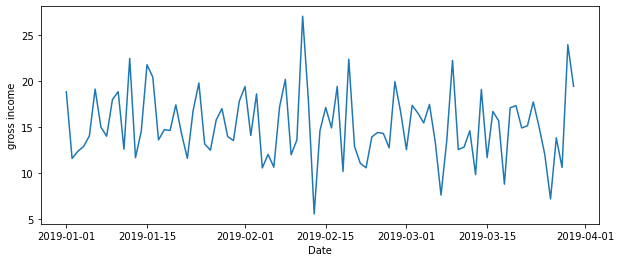

In [37]:
plt.figure(figsize=(10,4))
ax=sns.lineplot(x= data.groupby(data.Date).mean().index, 
             y = data.groupby(data.Date).mean()['gross income'])


In [38]:
Time_Series = data.groupby(data.Date).mean()['gross income']
Time_Series

Date
2019-01-01    18.830083
2019-01-02    11.580375
2019-01-03    12.369813
2019-01-04    12.886417
2019-01-05    14.034458
                ...    
2019-03-26     7.188692
2019-03-27    13.822950
2019-03-28    10.616200
2019-03-29    23.947875
2019-03-30    19.424500
Name: gross income, Length: 89, dtype: float64

In [39]:
result = adfuller(Time_Series)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -8.638404825573984
p-value: 5.5101708471067446e-14
Critical Values:
	1%: -3.5078527246648834
	5%: -2.895382030636155
	10%: -2.584823877658872


In the above case, p value is (less than <0.5) which is very low, therefore we reject the null hypothesis and can deduce that our data is stationary

In [40]:
# Create lagged dataset
values = pd.DataFrame(Time_Series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

           t        t+1
0        NaN  18.830083
1  18.830083  11.580375
2  11.580375  12.369813
3  12.369813  12.886417
4  12.886417  14.034458


In [41]:
#split the time series into train and test
X = dataframe.values
train_size = int(len(X) * 0.66)
train_baseline, test_baseline = X[1:train_size], X[train_size:]
train_X, train_y = train_baseline[:,0], train_baseline[:,1]
test_X, test_y = test_baseline[:,0], test_baseline[:,1]

In [42]:
# persistence model
def model_persistence(x):
    return x

In [43]:
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
test_r2_score = r2_score(test_y, predictions)
print('Test R2 Score: %.3f' % test_r2_score)

Test MSE: 29.847
Test R2 Score: -1.066


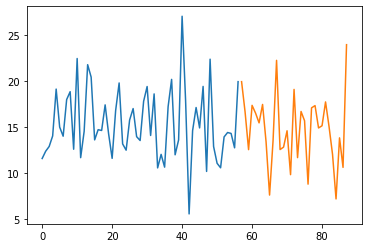

In [44]:
# plot predictions and expected results
plt.plot(train_y)
#plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

<u> <font color ="purple"><h3>Machine Learning Models:</h3></font></u> <br>

### Part 1: Regression Analysis

**Linear Regression**

In [45]:
#extracting all the quantitative variables in the dataset
df=data.iloc[:, [6,7,8,9,13,14,15,16]]

df.head(10)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
856,21.12,8,8.448,177.408,168.96,4.761905,8.448,6.3
567,65.74,9,29.583,621.243,591.66,4.761905,29.583,7.7
245,47.59,8,19.036,399.756,380.72,4.761905,19.036,5.7
696,27.04,4,5.408,113.568,108.16,4.761905,5.408,6.9
523,62.87,2,6.287,132.027,125.74,4.761905,6.287,5.0
829,74.22,10,37.110,779.310,742.20,4.761905,37.110,4.3
496,63.22,2,6.322,132.762,126.44,4.761905,6.322,8.5
970,84.63,10,42.315,888.615,846.30,4.761905,42.315,9.0
484,36.98,10,18.490,388.290,369.80,4.761905,18.490,7.0
17,72.61,6,21.783,457.443,435.66,4.761905,21.783,6.9


In [46]:
x = df.iloc[:,[0,1]].values  #Unit price and Quantity
y = df.iloc[:,-2].values   #Gross Income

x.shape

(1000, 2)

In [47]:
y.shape

(1000,)

In [48]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [49]:
# Training the Simple Linear Regression model on the Training set
model1 = LinearRegression()
model1_results = model1.fit(X_train, y_train)

# Predicting the gross income
y1_pred = model1_results.predict(X_test)

#evaluate model
R2 = r2_score(y_test, y1_pred)
print('R^2 of the linear regression model is: ',R2)

MSE1 = mean_squared_error(y_test, y1_pred)
print('Mean Squared Error of linear regression model is: ',MSE1)

R^2 of the linear regression model is:  0.8771175044436396
Mean Squared Error of linear regression model is:  17.752487867084017


We can see that the R squared value for the Linear Regression Model is around 0.86 which proves the model t be performing well.However we are just using two features here and to reduce the bias we can use more impactful features and also the categorical predictors (after we encode them) and tune our linear regression model further. Also we can look for ways to reduce the mean squared error value for this linear regression model.

**Random Forest Regression**

In [50]:
# Training the Simple Linear Regression model on the Training set
model_rf = RandomForestRegressor()
modelrf_results = model_rf.fit(X_train, y_train)

# Predicting the gross income
yrf_pred = modelrf_results.predict(X_test)

#evaluate model
R2_rf = r2_score(y_test, yrf_pred)
print('R^2 of the Random Forest regression model is: ',R2_rf)
MSE_rf = mean_squared_error(y_test, yrf_pred)
print('Mean Squared Error of Random Forest regression model is: ',MSE_rf)

R^2 of the Random Forest regression model is:  0.9994287699296528
Mean Squared Error of Random Forest regression model is:  0.0825239986154168


We see that the R squared value for Random forest reggressor model is almost 1 which will make the best predictions for gross income.However there is scope for improvement for this model based on parameters to be used in random forest regressor and larger input predictors variables to be used (to reduce bias).

**Gradient Boosting Regression**

In [51]:
# Training the Simple Linear Regression model on the Training set
model_GB = GradientBoostingRegressor()
modelGB_results = model_GB.fit(X_train, y_train)

# Predicting the gross income
yGB_pred = modelGB_results.predict(X_test)

#evaluate model
R2_GB = r2_score(y_test, yGB_pred)
print('R^2 of the Random Forest regression model is: ',R2_GB)
MSE_GB = mean_squared_error(y_test, yGB_pred)
print('Mean Squared Error of Random Forest regression model is: ',MSE_GB)

R^2 of the Random Forest regression model is:  0.9983703652633223
Mean Squared Error of Random Forest regression model is:  0.23542873832164987


We see that the R squared value for Gradient boosting reggressor model is high which will be making the good predictions for gross income.However there is scope for improvement for this model based on parameters to be used in gradient boosting regressor and multiple input predictors variables (to reduce bias).

**Support Vector Regression**

In [52]:
# Training the Simple Linear Regression model on the Training set
model_SR = SVR()
modelSR_results = model_SR.fit(X_train, y_train)

# Predicting the gross income
ySR_pred = modelSR_results.predict(X_test)

#evaluate model
R2_SR = r2_score(y_test, ySR_pred)
print('R^2 of the Random Forest regression model is: ',R2_SR)
MSE_SR = mean_squared_error(y_test, ySR_pred)
print('Mean Squared Error of Random Forest regression model is: ',MSE_SR)

R^2 of the Random Forest regression model is:  0.6927269750447524
Mean Squared Error of Random Forest regression model is:  44.39086806223226


We see that the R squared value for Support Vector regression model 0.644 which is not very high to make the good predictions for gross income.There is still scope for improvement for the model which we can further explore by using multiple input predictors variables.

<font color ="purple">As a next step in this project, we decided to encode the categorical variables and use our categorical and numeric variables together to predict our target variable (gross income)</font>

In [53]:
#Create dummy variables for "Gender"  categorical variable
dummy = pd.get_dummies(data=data['Gender'])

#Create dummy variables for "Customer type" categorical variable
dummy1 = pd.get_dummies(data=data['Customer type'])

#Create dummy variables for "Product line" categorical variable
dummy2 = pd.get_dummies(data=data['Product line'])

#Create dummy variables for "City" categorical variable
dummy3 = pd.get_dummies(data=data['City'])

#Create dummy variables for "Payment" categorical variable
dummy4 = pd.get_dummies(data=data['Payment'])

dataset = pd.concat([df, dummy,dummy1,dummy2,dummy3,dummy4], axis = 1)
dataset.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Female,Male,...,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Mandalay,Naypyitaw,Yangon,Cash,Credit card,Ewallet
856,21.12,8,8.448,177.408,168.96,4.761905,8.448,6.3,0,1,...,1,0,0,0,1,0,0,1,0,0
567,65.74,9,29.583,621.243,591.66,4.761905,29.583,7.7,1,0,...,0,0,0,0,0,0,1,1,0,0
245,47.59,8,19.036,399.756,380.72,4.761905,19.036,5.7,0,1,...,0,0,1,0,0,0,1,1,0,0
696,27.04,4,5.408,113.568,108.16,4.761905,5.408,6.9,1,0,...,0,0,0,1,0,0,1,0,0,1
523,62.87,2,6.287,132.027,125.74,4.761905,6.287,5.0,0,1,...,0,1,0,0,0,1,0,1,0,0


<font color = "purple">First we are trying to use only Unit price,Quantitity, Gender & Customer type as our predictors </font>

In [54]:
x_new = dataset.iloc[:,[0,1,8,9,10,11]].values  #Unit price,Quantitity, Gender & Customer type
y_new = dataset.iloc[:,-6].values   #Gross Income

In [55]:
x_new.shape

(1000, 6)

In [56]:
y_new.shape

(1000,)

In [57]:
#Standardizing data
scaler = StandardScaler()
scaler.fit(x_new)
transformed_data = scaler.transform(x_new)
transformed_data

array([[-1.30477086,  0.85216524, -1.002002  ,  1.002002  , -1.002002  ,
         1.002002  ],
       [ 0.38018679,  1.19440028,  0.998002  , -0.998002  , -1.002002  ,
         1.002002  ],
       [-0.30520051,  0.85216524, -1.002002  ,  1.002002  ,  0.998002  ,
        -0.998002  ],
       ...,
       [ 1.55384174, -0.85900994, -1.002002  ,  1.002002  ,  0.998002  ,
        -0.998002  ],
       [ 1.27666583, -0.17453987,  0.998002  , -0.998002  , -1.002002  ,
         1.002002  ],
       [ 0.33109569, -0.17453987,  0.998002  , -0.998002  ,  0.998002  ,
        -0.998002  ]])

In [58]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
Xnew_train, Xnew_test, ynew_train, ynew_test = train_test_split(transformed_data, y_new, test_size = 0.3)

**Linear Regression Model**

In [59]:
# Training the Simple Linear Regression model on the Training set
model1 = LinearRegression()
model1new_results = model1.fit(Xnew_train, ynew_train)

# Predicting the gross income
y1new_pred = model1new_results.predict(Xnew_test)

#evaluate model
R2new = r2_score(ynew_test, y1new_pred)
print('R^2 of the linear regression model is: ',R2new)

MSE1new = mean_squared_error(ynew_test, y1new_pred)
print('Mean Squared Error of linear regression model is: ',MSE1new)

R^2 of the linear regression model is:  -0.0010974379019252911
Mean Squared Error of linear regression model is:  0.2213426435201156


**Random Forest Regression**

In [60]:
# Training the Simple Linear Regression model on the Training set
modelnew_rf = RandomForestRegressor()
modelnewrf_results = modelnew_rf.fit(Xnew_train, ynew_train)

# Predicting the gross income
ynewrf_pred = modelnewrf_results.predict(Xnew_test)

#evaluate model
R2new_rf = r2_score(ynew_test, ynewrf_pred)
print('R^2 of the Random Forest regression model is: ',R2new_rf)
MSEnew_rf = mean_squared_error(ynew_test, ynewrf_pred)
print('Mean Squared Error of Random Forest regression model is: ',MSEnew_rf)

R^2 of the Random Forest regression model is:  -0.22774204986029822
Mean Squared Error of Random Forest regression model is:  0.27145376722411185


**Gradient Boosting Regression**

In [61]:
# Training the Simple Linear Regression model on the Training set
modelnew_GB = GradientBoostingRegressor()
modelnewGB_results = modelnew_GB.fit(Xnew_train, ynew_train)

# Predicting the gross income
ynewGB_pred = modelnewGB_results.predict(Xnew_test)

#evaluate model
R2new_GB = r2_score(ynew_test, ynewGB_pred)
print('R^2 of the Gradient Boosting regression model is: ',R2new_GB)
MSEnew_GB = mean_squared_error(ynew_test, ynewGB_pred)
print('Mean Squared Error of Gradient Boosting regression model is: ',MSEnew_GB)

R^2 of the Gradient Boosting regression model is:  -0.08032277040905034
Mean Squared Error of Gradient Boosting regression model is:  0.238859364537441


**Support Vector Regression**

In [62]:
# Training the Simple Linear Regression model on the Training set
modelnew_SR = SVR()
modelnewSR_results = modelnew_SR.fit(Xnew_train, ynew_train)

# Predicting the gross income
ynewSR_pred = modelnewSR_results.predict(Xnew_test)

#evaluate model
R2new_SR = r2_score(ynew_test, ynewSR_pred)
print('R^2 of the Support vector regression model is: ',R2new_SR)
MSEnew_SR = mean_squared_error(ynew_test, ynewSR_pred)
print('Mean Squared Error of Support vector regression model is: ',MSEnew_SR)

R^2 of the Support vector regression model is:  -0.23523445106943308
Mean Squared Error of Support vector regression model is:  0.2731103371314516


<font color = "purple">Now we will use almost all predictors (Quantitative (Unit Price & Quantity) & Categorical variables (Gender, Customer Type, City, Payment, Product Line) to get the required target (gross income) </font>

In [64]:
x_new2 = dataset.iloc[:,[0,1,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].values #Unit price,Quantitity, Gender, Customer type,City, Payment, Product Line
y_new2 = dataset.iloc[:,-18].values   #Gross Income

In [65]:
x_new2.shape

(1000, 18)

In [66]:
y_new2.shape

(1000,)

In [67]:
#Standardizing data
scaler2 = StandardScaler()
scaler2.fit(x_new2)
transformed_data2 = scaler2.transform(x_new2)
transformed_data2

array([[-1.30477086,  0.85216524, -1.002002  , ...,  1.38093329,
        -0.67184731, -0.7257531 ],
       [ 0.38018679,  1.19440028,  0.998002  , ...,  1.38093329,
        -0.67184731, -0.7257531 ],
       [-0.30520051,  0.85216524, -1.002002  , ...,  1.38093329,
        -0.67184731, -0.7257531 ],
       ...,
       [ 1.55384174, -0.85900994, -1.002002  , ...,  1.38093329,
        -0.67184731, -0.7257531 ],
       [ 1.27666583, -0.17453987,  0.998002  , ...,  1.38093329,
        -0.67184731, -0.7257531 ],
       [ 0.33109569, -0.17453987,  0.998002  , ...,  1.38093329,
        -0.67184731, -0.7257531 ]])

In [68]:
# Splitting the dataset into the Training set and Test set
Xnew_train2, Xnew_test2, ynew_train2, ynew_test2 = train_test_split(transformed_data2, y_new2, test_size = 0.3)

**Linear Regression Model**

In [69]:
# Training the Simple Linear Regression model on the Training set
model_LR = LinearRegression()
model_LR_results = model_LR.fit(Xnew_train2, ynew_train2)

# Predicting the gross income
yLRnew_pred = model_LR_results.predict(Xnew_test2)

#evaluate model
R2LRnew = r2_score(ynew_test2, yLRnew_pred)
print('R^2 of the linear regression model is: ',R2LRnew)

MSELRnew = mean_squared_error(ynew_test2, yLRnew_pred)
print('Mean Squared Error of linear regression model is: ',MSELRnew)

R^2 of the linear regression model is:  0.8816969386000758
Mean Squared Error of linear regression model is:  16.083138943289473


**Random Forest Regression**

In [71]:
# Training the Simple Linear Regression model on the Training set
modelnew_rf2 = RandomForestRegressor()
modelnewrf2_results = modelnew_rf2.fit(Xnew_train2, ynew_train2)

# Predicting the gross income
ynewrf2_pred = modelnewrf2_results.predict(Xnew_test2)

#evaluate model
R2new_rf2 = r2_score(ynew_test2, ynewrf2_pred)
print('R^2 of the Random Forest regression model is: ',R2new_rf2)
MSEnew_rf2 = mean_squared_error(ynew_test2, ynewrf2_pred)
print('Mean Squared Error of Random Forest regression model is: ',MSEnew_rf2)

R^2 of the Random Forest regression model is:  0.9990951705219453
Mean Squared Error of Random Forest regression model is:  0.12301032655733465


**Gradient Boosting Regression**

In [72]:
# Training the Simple Linear Regression model on the Training set
modelnew_GB2 = GradientBoostingRegressor()
modelnewGB2_results = modelnew_GB2.fit(Xnew_train2, ynew_train2)

# Predicting the gross income
ynewGB2_pred = modelnewGB2_results.predict(Xnew_test2)

#evaluate model
R2new_GB2 = r2_score(ynew_test2, ynewGB2_pred)
print('R^2 of the Gradient Boosting regression model is: ',R2new_GB2)
MSEnew_GB2 = mean_squared_error(ynew_test2, ynewGB2_pred)
print('Mean Squared Error of Gradient Boosting regression model is: ',MSEnew_GB2)

R^2 of the Gradient Boosting regression model is:  0.9983490623022543
Mean Squared Error of Gradient Boosting regression model is:  0.22444271572820185


**Support Vector Regression**

In [73]:
# Training the Simple Linear Regression model on the Training set
modelnew_SR2 = SVR()
modelnewSR2_results = modelnew_SR2.fit(Xnew_train2, ynew_train2)

# Predicting the gross income
ynewSR2_pred = modelnewSR2_results.predict(Xnew_test2)

#evaluate model
R2new_SR2 = r2_score(ynew_test2, ynewSR2_pred)
print('R^2 of the Support Vector regression model is: ',R2new_SR2)
MSEnew_SR2 = mean_squared_error(ynew_test2, ynewSR2_pred)
print('Mean Squared Error of Support Vector regression model is: ',MSEnew_SR2)

R^2 of the Support Vector regression model is:  0.7835986031477227
Mean Squared Error of Support Vector regression model is:  29.419473105024238


In [74]:
print('\nPerformance Measures of implemented Machine Learning Models when only Quantitative predictors (input variables) are used:')
performance_results1 = pd.DataFrame()
performance_results1['Model Name'] = ['Linear Regression','Random Forest Regression','Gradient Boosting Regression',
                                     'Support Vector Regression']
performance_results1['R-Squared'] = [R2,R2_rf,R2_GB,R2_SR]
performance_results1['MSE'] = [MSE1,MSE_rf,MSE_GB,MSE_SR]

performance_results1.set_index('Model Name', inplace=True)
performance_results1


Performance Measures of implemented Machine Learning Models when only Quantitative predictors (input variables) are used:


,R-Squared,MSE
Model Name,,
Linear Regression,0.877118,17.752488
Random Forest Regression,0.999429,0.082524
Gradient Boosting Regression,0.998370,0.235429
Support Vector Regression,0.692727,44.390868


In [75]:
print('\nPerformance Measures of implemented Machine Learning Models when both Quantitative (Unit price, Quantity) & Categorical predictors (Gender,Customer Type) (input variables) are used:')
performance_results2 = pd.DataFrame()
performance_results2['Model Name'] = ['Linear Regression','Random Forest Regression','Gradient Boosting Regression',
                                     'Support Vector Regression']
performance_results2['R-Squared'] = [R2new,R2new_rf,R2new_GB,R2new_SR]
performance_results2['MSE'] = [MSE1new,MSEnew_rf,MSEnew_GB,MSEnew_SR]

performance_results2.set_index('Model Name', inplace=True)
performance_results2


Performance Measures of implemented Machine Learning Models when both Quantitative (Unit price, Quantity) & Categorical predictors (Gender,Customer Type) (input variables) are used:


,R-Squared,MSE
Model Name,,
Linear Regression,-0.001097,0.221343
Random Forest Regression,-0.227742,0.271454
Gradient Boosting Regression,-0.080323,0.238859
Support Vector Regression,-0.235234,0.273110


In [76]:
print('\nPerformance Measures of implemented Machine Learning Models when almost all predictors (Quantitative (Unit Price & Quantity) & Categorical variables (Gender, Customer Type, City, Payment, Product Line) are used:')
performance_results3 = pd.DataFrame()
performance_results3['Model Name'] = ['Linear Regression','Random Forest Regression','Gradient Boosting Regression',
                                     'Support Vector Regression']
performance_results3['R-Squared'] = [R2LRnew,R2new_rf2,R2new_GB2,R2new_SR2]
performance_results3['MSE'] = [MSELRnew,MSEnew_rf2,MSEnew_GB2,MSEnew_SR2]

performance_results3.set_index('Model Name', inplace=True)
performance_results3


Performance Measures of implemented Machine Learning Models when almost all predictors (Quantitative (Unit Price & Quantity) & Categorical variables (Gender, Customer Type, City, Payment, Product Line) are used:


,R-Squared,MSE
Model Name,,
Linear Regression,0.881697,16.083139
Random Forest Regression,0.999095,0.123010
Gradient Boosting Regression,0.998349,0.224443
Support Vector Regression,0.783599,29.419473


Based on R2 square and MSE now we observe that Gradient Boosting Regressor and Random Forest Regressor perform well in our machine learning models.

### Part 2: Time Series Forecasting

We see that There are multiple transactions done a particular date in all the three branches of supermarket maybe at different times. Thus we would take mean value of gross income generated on a day across all three branches of supermarket.

In [77]:
Time_Series

Date
2019-01-01    18.830083
2019-01-02    11.580375
2019-01-03    12.369813
2019-01-04    12.886417
2019-01-05    14.034458
                ...    
2019-03-26     7.188692
2019-03-27    13.822950
2019-03-28    10.616200
2019-03-29    23.947875
2019-03-30    19.424500
Name: gross income, Length: 89, dtype: float64

In [78]:
result = adfuller(Time_Series)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -8.638404825573984
p-value: 5.5101708471067446e-14
Critical Values:
	1%: -3.5078527246648834
	5%: -2.895382030636155
	10%: -2.584823877658872


In the above case, p value is (less than <0.5) which is very low, therefore we reject the null hypothesis and can deduce that our data is stationary

In [79]:
# split into train and test sets
X_time = Time_Series.values
size = int(len(X_time) * 0.70)
train, test = X_time[0:size], X_time[size:len(X_time)]
train_set = [x for x in train]

In [80]:
train.shape

(62,)

In [81]:
test.shape

(27,)

In [82]:
# fit model
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model2 = ARIMA(train_set, order=(5,1,0))
    model_fit = model2.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    train_set.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=15.685799, expected=15.454125
predicted=15.760452, expected=17.453441
predicted=16.303924, expected=13.387864
predicted=15.742964, expected=7.609833
predicted=15.617840, expected=13.529818
predicted=15.619745, expected=22.244187
predicted=13.804509, expected=12.552500
predicted=11.022123, expected=12.819273
predicted=15.233815, expected=14.593458
predicted=15.445963, expected=9.826700
predicted=14.124444, expected=19.086333
predicted=15.795360, expected=11.676250
predicted=11.650863, expected=16.690333
predicted=14.656712, expected=15.684833
predicted=13.850193, expected=8.794786
predicted=14.616541, expected=17.084500
predicted=15.748228, expected=17.327633
predicted=13.180078, expected=14.900917
predicted=14.263340, expected=15.138800
predicted=14.741243, expected=17.727455
predicted=15.755574, expected=15.053955
predicted=15.790721, expected=12.026278
predicted=16.025823, expected=7.188692
predicted=15.103555, expected=13.822950
predicted=15.017223, expected=10.616200
pred

Test RMSE: 4.712897624252763


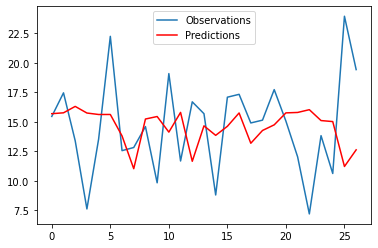

In [83]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print("Test RMSE: {}".format(rmse))
# plot forecasts against actual outcomes
plt.plot(test,label='Observations')
plt.plot(predictions, color='red',label='Predictions')
plt.legend(loc='best')
plt.show()

<u> <font color ="purple"><h3>Conclusion:</h3></font></u> <br>

After trying and testing 4 different algorithms for regression analysis of gross income, the best score on the leaderboard is achieved by Random forest algorithm using only quantitative predictors. The Random Forest algorithm is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) is combined to make a powerful prediction model. For time series forecasting, ARIMA model was implemented on the data set. The performance of the ARIMA model can be considered to be good since it gave a very low RMSE (Root Mean Square Error) value.